In [8]:
#from fractions import Fraction
#from math import log
import matplotlib.pyplot as plt
#import numpy as np
import sympy as sp

sp.init_printing()
n, i = sp.symbols("n i", integer=True, positive=True)
k = sp.symbols("k", integer=True, nonnegative=True)

In [9]:
# True Function
def nCk(n,k):
    result=1
    k = min(k,n-k)
    return int(np.prod(
        (np.arange(n,n-k,-1) + Fraction())
        / np.arange(1,k+1)
    ))

def nCk_iter(n):
    result = 1
    i = 0
    while True:
        yield result
        if i >= n: break
        result = (result*Fraction(n-i, i+1))._numerator
        i += 1

# Estimates

In [10]:
def hyper_sq(x):
    return x ** x

_1div2 = sp.Rational(1,2)

nCk_ests_sp = [
    # Trivial estimate
    n ** k,
    # Simple estimate
    (n-k+1) ** k,
    # Gauss approx.
    n ** (k*(n-k)/(n-1)),
    # Integral approx.
    sp.sqrt(_1div2)* hyper_sq(n+_1div2) / (
        hyper_sq(n-k+_1div2) * hyper_sq(k+_1div2))
]
for j in range(len(nCk_ests_sp)):
    nCk_ests_sp[j] = nCk_ests_sp[j].simplify()
del _1div2

est_labels = (
    "trivial",
    "simple",
    "Gaussian approx.",
    "Integral approx."
)

est_styles = (
    "m",
    "r",
    "y",
    "g",    
)

In [11]:
def plot_nCk_w_est(indices_ests):
    for n_val in (3,10,100):
        plot = sp.plotting.plot(
            sp.binomial(n_val, k), (k, 0, n_val),
            line_color="k",
            title="nCk & Estimates (n = " + str(n_val) + ")",
            xlabel="k-values",
            xscale="linear",
            yscale="log",
            #axis_center=(0,1), #causes strange errors in plot display
            #legend=True,
            show=False
        )
        
        for index in indices_ests:
            plot.extend(sp.plotting.plot(
                nCk_ests_sp[index].subs(n,n_val), (k, 0, n_val),
                line_color=est_styles[index],
                title=est_labels[index],
                show=False
            ))

        plot.show()
        

# Proofs

In [67]:
nCk = sp.binomial(n,k)
display(nCk)

#nCk_ln = sp.Sum(sp.ln(n-i+1) - sp.ln(i), (i, 1, k))
#display(nCk_ln)


## Proof - for $n\hat{C}k = n^{\left(\frac{k(n-k)}{n-1}\right)}$

Goal: WTS $nCk = O\left(n\hat{C}k\right)$ 

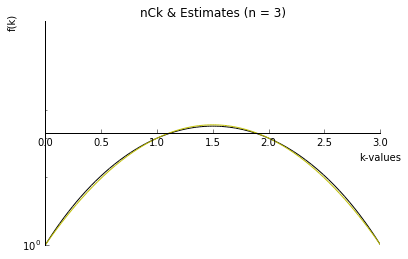

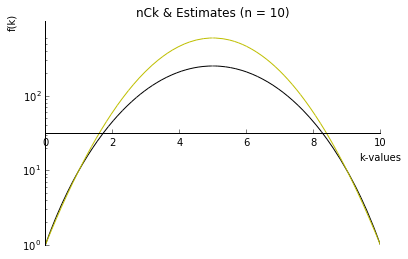

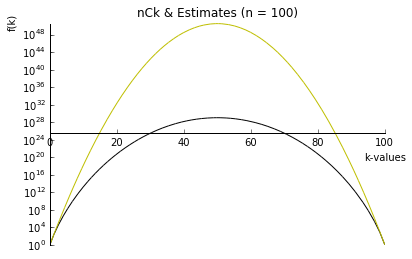

In [68]:
plot_nCk_w_est([2])

In [69]:
nCk_est = nCk_ests_sp[2]

nCk_est

### Rephrasing Goal
- $nCk = nC(n-k)$, $n\hat{C}k = n\hat{C}(n-k)$
- Small $n,k$ cases - $0C0 = 0\hat{C}0 = 1$
- ETS that $\forall n\in\mathbb{N}$, $k\in [0,\frac{n}{2}]$: $nCk \leq n\hat{C}k$

In [70]:
assert nCk_est == nCk_est.subs(k, n-k).simplify()
print("nCk_est is symmetric about k = n/2")

assert nCk_est.subs({n: 0, k: 0}).simplify() == 1
print("0C0_est = 1")

nCk_est is symmetric about k = n/2
0C0_est = 1


### Element-wise increase
- $nCk = \prod_{i=1}^{k} \frac{n+1}{i}-1$
- $n\hat{C}k = n^{\left(\frac{k(n-k)}{n-1}\right)}
    = \prod_{i=1}^{k} {\left(n^\frac1{n-1}\right)} ^ {i(n-i) - (i-1)(n-i+1)}
    = \prod_{i=1}^{k} {\left(n^\frac1{n-1}\right)} ^ {n+1-2i}$
- Let $f_n(i) := \log_n\left( \frac{n\hat{C}i}{n\hat{C}(i-1)} \cdot \frac{nC(i-1)}{nCi} \right)
    = \frac{n+1-2i}{n-1} + \log_n(i) - \log_n(n-i+1)$
- ETS that $f_n(i) \geq 0\ \forall n\in\mathbb{N}$, $i\in [1,\frac{n}{2}]$:

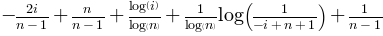

In [71]:
f = sp.log(
    (nCk_est.subs(k,i) / nCk_est.subs(k,i-1))
    / (nCk.subs(k,i) / nCk.subs(k,i-1)),
    n)
f = sp.simplify(f)

f

### Derivatives of $f$:
- $\frac{d}{di} f_n(i) = \frac{-2}{n-1} + \frac1{\ln(n)i} + \frac1{\ln(n)(n+1-i)}
    = \frac{-2}{n-1} + \frac{n+1}{i(n+1-i)\ln(n)}$
- $\frac{d^2}{di^2} f_n(i) = 0 + \frac{-1}{\ln(n)i^2} + \frac1{\ln(n)(n+1-i)^2}
    = \frac1{\ln(n)} \left( {\frac1{n+1-i}}^2 - {\frac1{i}}^2 \right)$

In [72]:
der_f_comp = sp.diff(f, i)
der2_f_comp = sp.diff(der_f_comp, i)
#display(der_f_comp)
#display(der2_f_comp)

der_f_byhand = (-2 / (n-1)) + ((n+1) / (i*(n+1-i)*sp.log(n)))
der2_f_byhand = ((1/(n+1-i)**2) - (1/i**2)) / sp.log(n)

n_val = 1000
assert sp.simplify(der_f_comp - der_f_byhand) == 0
#sp.plotting.plot(der_f_comp.subs(n,n_val) - der_f_byhand.subs(n,n_val), (i,1,n_val))
assert sp.simplify(der2_f_comp - der2_f_byhand) == 0
#sp.plotting.plot(der2_f_comp.subs(n,n_val) - der2_f_byhand.subs(n,n_val), (i,1,n_val))
print("First and second derivatives are as derived above")

der_f = der_f_byhand
der2_f = der2_f_byhand
del der_f_byhand, der2_f_byhand, der_f_comp, der2_f_comp
pass

First and second derivatives are as derived above


### Proof by Convexity
- for $i\in[1,\frac{n+1}{2}]$, $i \leq n+1-i \Rightarrow {\frac1{n+1-i}}^2 - {\frac1{i}}^2 \leq 0$
    - $\Rightarrow \frac{d^2}{di^2} f_n(i) \leq 0$
- $f_n(1) = \frac{n+1-2}{n-1} + \log_n(1) - \log_n(n-1+1) = \frac{1}{1} - 1 = 0$
- $f_n\left(\frac{n+1}{2}\right)
    = \frac{0}{n-1} + \log_n\left(\frac{\frac{n+1}{2}}{\frac{n+1}{2}}\right) = 0$
- $\Rightarrow \forall i\in[1,\frac{n+1}{2}]$, $f_n(i) \geq 0$
- $\therefore nCk = O\left(n\hat{C}k\right)$

Demo: Assertion of Convexity


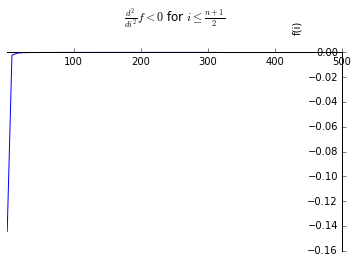

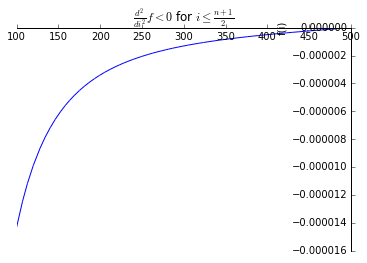

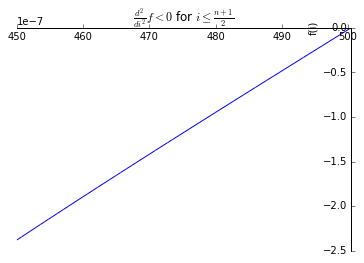

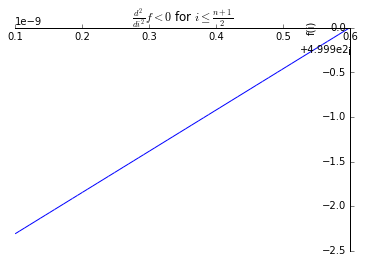

In [73]:
# TODO make a cleaner demo of convexity
n_val = 1000
i_last = (n_val+1)/2

print("Demo: Assertion of Convexity")
for i_first in (1, 100, 450, 500):
    sp.plotting.plot(der2_f.subs(n,n_val).simplify(), (i, i_first, i_last),
                     axis_center = (i_last,0), title = "$\\frac{d^2}{di^2} f < 0$ for $i \\leq \\frac{n+1}{2}$")

In [74]:
print("Assertion of Endpoints")

assert f.subs(i, 1).simplify() == 0
print("\tf_n(1) = 0")

assert f.subs(i, (n+1)/2).simplify() == 0
print("\tf_n((n+1)/2) = 0")


Assertion of Endpoints
	f_n(1) = 0
	f_n((n+1)/2) = 0


### QED

## Proof - for $n\hat{C}k = \sqrt{\frac{1}{2}} \cdot \frac{^2 \left(n+\frac{1}{2}\right)}{
        ^2 \left(n-k+\frac{1}{2}\right)
        \cdot ^2 \left(k+\frac{1}{2}\right)
        }$

*Formulation* - $\ln{\left(n\hat{C}k\right)}
    := \int_{\frac12}^{k-\frac12} \left[\ln{(n+1-x)}-\ln{(x)}\right]dx$

***Goal***: WTS $nCk = \Theta\left(n\hat{C}k\right)$ 

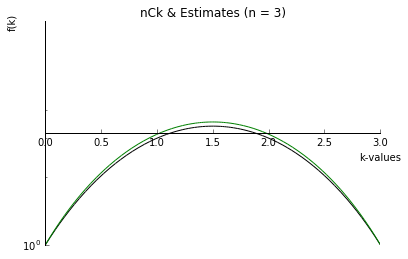

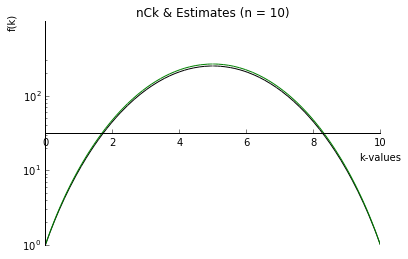

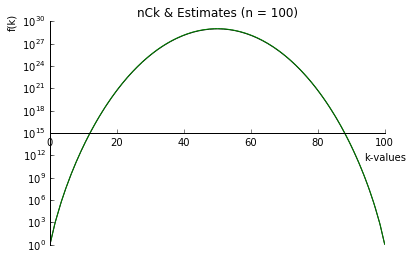

In [21]:
plot_nCk_w_est([3])

In [49]:
nCk_est = nCk_ests_sp[3]
nCk_est_ln = sp.expand_log(sp.ln(nCk_est))

display(nCk_est)
display(nCk_est_ln)

### First: WTS $nCk = O\left(n\hat{C}k\right)$ 

#### Rephrasing Goals
- $nCk = nC(n-k)$, $n\hat{C}k = n\hat{C}(n-k)$
- ETS that $\forall n\in\mathbb{Z}_+$, $k\in\left[0,\frac{n}{2}\right]$: $nCk \leq n\hat{C}k$

In [26]:
assert nCk_est == nCk_est.subs(k,n-k).simplify()
print("nCk_est is symmetric about k = n/2")

nCk_est is symmetric about k = n/2


#### Element-wise increase
- $nCk = \prod_{i=1}^{k} \frac{n+1}{i}-1$
- $n\hat{C}k = \sqrt{\frac{1}{2}} \cdot \frac{^2 (n+0.5)}{^2 (n-k+0.5) \cdot ^2 (k+0.5)}
    = \prod_{i=1}^{k} \frac{^2 (n-k+1.5) \cdot ^2 (k-0.5)}{^2 (n-k+0.5) \cdot ^2 (k+0.5)}$
- Let $f_n(i) := \ln\left( \frac{n\hat{C}k}{n\hat{C}(k-1)} \cdot \frac{nC(k-1)}{nCk} \right)$
    - (Let $xlnx(i) := i\ln(i)$)
    - $= \left[xlnx(n-i+1.5) + xlnx(i-0.5) - xlnx(n-i+0.5) - xlnx(i+0.5)\right]
        - \ln(n-i+1) + \ln(i)$
- ETS that $f_n(i) \geq 0\ \ \forall n\in\mathbb{N}$, $k\in [1,\frac{n}{2}]$

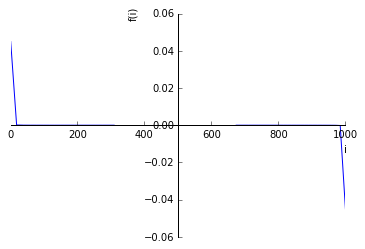

In [27]:
f = sp.log(
    (nCk_est.subs(k,i) / nCk_est.subs(k,i-1)).simplify()
    / (nCk.subs(k,i) / nCk.subs(k,i-1)).simplify()
)
f = sp.expand_log(f, force=True)#.refine(sp.Q.nonnegative(-i+n)))

display(f)
n_val = 1000
sp.plotting.plot(f.subs(n,n_val), (i, 1, n_val))

#### Derivatives of $f$
- $\frac{d}{di} f_n(i)
    = \frac{n+1}{i(n+1-i)} -
    ( \ln{(2i+1)}
    - \ln{(2i-1)}
    + \ln{(2(n-i)+3)}
    - \ln{(2(n-i)+1)})$

- $\frac{d^2}{di^2} f_n(i) = \frac
    {(n+1)(n+1-2i)(4n^2 - 8(n-i)(i-1) + 3)}
    {i^2 (2i-1)(2i+1) (n+1-i)^2 (2n+3-2i) (2n+1-2i)}$

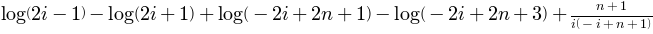

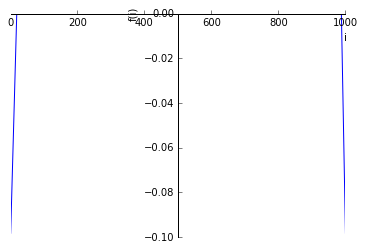

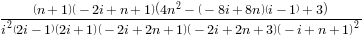

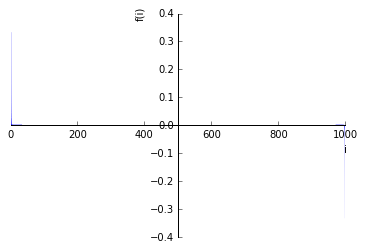

First and second derivatives are as derived above


In [28]:
der_f_comp = sp.expand_log(f.diff(i).simplify())#.refine(sp.Q.nonnegative(-i+n)))
der2_f_comp = sp.diff(der_f_comp, i).factor()

der_f_byhand = ((n+1)/(i*(n+1-i))) - (
    sp.ln(2*i+1) - sp.ln(2*i-1)
    + sp.ln(2*(n-i)+3) - sp.ln(2*(n-i)+1)
)
der2_f_byhand = (
    ((n+1) * (n+1-2*i) * (4*n**2 - 8*(n-i)*(i-1) + 3))
    / (i**2 * (2*i-1) * (2*i+1) * (2*n+3-2*i) * (2*n+1-2*i) * (n+1-i)**2)
)

display(der_f_byhand)
sp.plotting.plot(der_f_byhand.subs(n,1000), (i,1,1000))

display(der2_f_byhand)
sp.plotting.plot(der2_f_byhand.subs(n,1000), (i,1,1000))

assert sp.simplify(der_f_comp - der_f_byhand) == 0
assert sp.simplify(der2_f_comp - der2_f_byhand) == 0
print("First and second derivatives are as derived above")

der_f = der_f_byhand
der2_f = der2_f_byhand
del der_f_byhand, der2_f_byhand
del der_f_comp, der2_f_comp

#### Proof by Monotonicity

- $f_n\left(\frac{n+1}{2}\right)
    = \left[xlnx\left(\frac{n}{2}+1\right)
    + xlnx\left(\frac{n}{2}\right)
    - xlnx\left(\frac{n}{2}\right)
    - xlnx\left(\frac{n}{2}+1\right)\right]
    - \ln\left(\frac{n+1}{2}\right)
    + \ln\left(\frac{n+1}{2}\right)$  
    $= 0$
- $\frac{d}{di} f_n\left(\frac{n+1}{2}\right)
    = \ln{(n)} - \ln{(n+2)} + \ln{(n)} - \ln{(n + 2)}
    + \frac{n+1}{\left(\frac{n+1}{2}\right)\left(\frac{n+1}{2}\right)}$          
    $= 2\left(\frac{2}{n+1} - (\ln{(n+2)} - \ln{(n)})\right)$
    - Let $g$ be a function s.t. $\frac{d^2}{dx^2} g(x) > 0$ for $x\in[a,b]$
        - $\rightarrow \int_a^b g(x)dx > (b-a) \cdot g(b-a)$
        - for $g(x) = \frac1x$, $\frac{d^2}{dx^2} g(x) = \frac{2}{x^3} > 0$ for all $x > 0$
        - $\Rightarrow \int_{n}^{n+2} \frac{dx}{x} = \ln{(n+2)} - \ln{(n)} > \frac{2}{n+1}$ for $n>0$
    - $\frac{d}{di} f_n\left(\frac{n+1}{2}\right) < 0$
- for $i\in\left[1, \frac{n+1}{2}\right]$, $\frac{d^2}{dx^2} f_n(i) \geq 0$
- $\Rightarrow f_n(i) > 0 \forall i\in\left[1, \frac{n+1}{2}\right]$

In [29]:
# Show that f at midpoint is zero
assert f.subs(i, (n+1)/2).simplify() == 0
print("f_n((n+1)/2) = 0")

f_n((n+1)/2) = 0


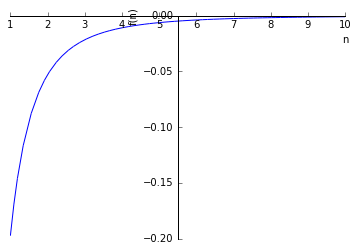

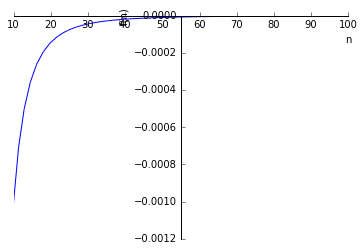

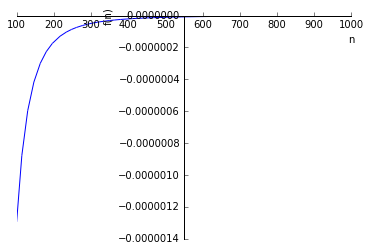

In [30]:
# Show that derivative at midpoint is less than zero
for i_first, i_last in zip((1,10,100), (10,100,1000)):
    sp.plotting.plot(der_f.subs(i, (n+1)/2), (n, i_first, i_last))#.cancel().collect(sp.ln(n)).collect(sp.ln(n+2)))

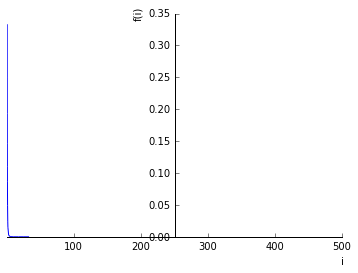

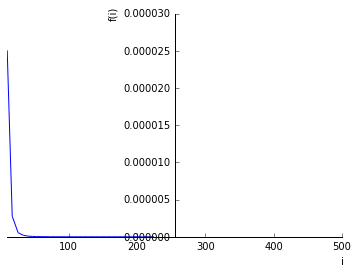

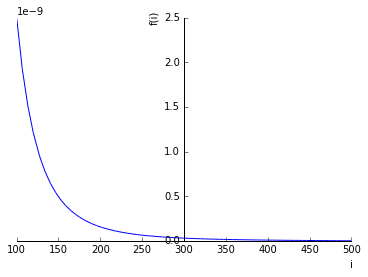

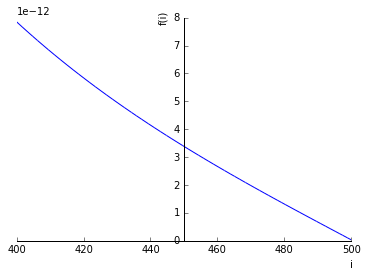

In [31]:
# Show that second derivative is positive from 1 to midpoint
for i_first in (1,10,100,400):
    sp.plotting.plot(der2_f.subs(n, n_val), (i, i_first, n_val/2))

#### QED

### Second: Prove that $nCk = \Omega\left(n\hat{C}k\right)$

#### Assessment at Midpoint
- $\frac{n\hat{C}k}{nCk} = \exp{\left(\sum_{i=1}^{k} f_n(i)\right)}$
- $f_n(i) \geq 0$ for $i\in\left[1,\frac{n}{2}\right]$
- $\Rightarrow \max\left(\left.\frac{n\hat{C}k}{nCk}\right| k\in[0,n]\right)
    = \frac{n\hat{C}\left(\frac{n}{2}\right)}{nC\left(\frac{n}{2}\right)}$
- ETS that $\sup\left(\frac{n\hat{C}\left(\frac{n}{2}\right)}{nC\left(\frac{n}{2}\right)}\right) < \infty$

- $\frac{n\hat{C}\left(\frac{n}{2}\right)}{nC\left(\frac{n}{2}\right)}
    = \exp\left(
        \int_{\frac12}^{\frac{n+1}{2}} \left[\ln{(n+1-x)}-\ln{(x)}\right]dx
        - \sum_{i=1}^{\frac{n}{2}} \left[\ln{(n+1-i)} - \ln{(i)}\right]
        \right)$  
    $= \exp\sum_{i=1}^{\frac{n}{2}} \left(
        \left(\ln{(i)}-\int_{i-\frac12}^{i+\frac12} \ln{(x)}dx\right)
        - \left(\ln{(n+1-i)}-\int_{i-\frac12}^{i+\frac12} \ln{(n+1-x)}dx\right)
        \right)$ 

[Euler-Maclaurin formula](https://en.wikipedia.org/wiki/Euler%E2%80%93Maclaurin_formula)

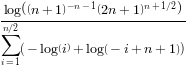

KeyboardInterrupt: 

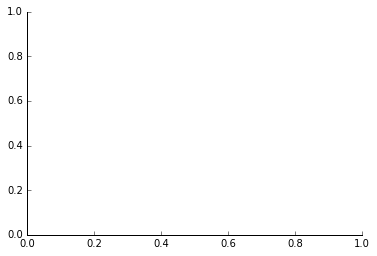

In [58]:
nCk_mid = nCk.subs(k, n/2).simplify()
nCk_est_mid = nCk_est.subs(k, n/2).simplify()
#display(nCk_est_mid / nCk_mid)

nCk_ln_mid = nCk_ln.subs(k, n/2).simplify()
nCk_est_ln_mid = nCk_est_ln.subs(k, n/2).simplify()
display(nCk_est_ln_mid / nCk_ln_mid)

sp.plotting.plot(nCk_est_ln_mid.subs(n,2*n) / nCk_ln_mid.subs(n,2*n), (n,1,10))

# Comparing Estimates

In [111]:
'''def plot_nckest(n_val, ests, omitted=0):
    plot = sp.plotting.plot(
        sp.binomial(n_val, k), (k, 0, n_val),
        line_color="k",
        title="nCk & Estimates (n = " + str(n_val) + ")",
        xlabel="k-values",
        yscale="log",
        axis_center=(0,1),
        legend=True,
        show=False
    )
    
    for i, func in enumerate(ests[omitted:], omitted):
        plot.extend(sp.plotting.plot(
            func.subs(n,n_val), (k, 0, n_val),
            line_color=est_styles[i],
            title=est_labels[i],
            show=False
        ))
    
    plot.show()

plot_nckest(2, nCk_ests_sp)
plot_nckest(3, nCk_ests_sp)
plot_nckest(10, nCk_ests_sp)
plot_nckest(100, nCk_ests_sp)
plot_nckest(100, nCk_ests_sp, omitted=2)
plot_nckest(120, nCk_ests_sp, omitted=3)'''
pass

In [27]:
def hyper_sq(x):
    return x ** x

nCk_ests = (
    lambda n,k: n ** k,
    lambda n,k: (n-k+1) ** k,
    lambda n,k: n ** (k*(n-k)/(n-1)),
    lambda n,k: np.sqrt(.5) * hyper_sq(n+.5) / (hyper_sq(n-k+.5) * hyper_sq(k+.5))
)

est_labels = (
    "$n^k$",
    "${(n-k+1)}^k$",
    "$n^{\\left(\\frac{k(n-k)}{n-1}\\right)}$",
    "$\\sqrt{\\frac{1}{2}} \\cdot \\frac{^2 \\left(n+\\frac{1}{2}\\right)}{"
        "^2 \\left(n-k+\\frac{1}{2}\\right)"
        "\\cdot ^2 \\left(k+\\frac{1}{2}\\right)"
        "}$"
)

est_styles = (
    "m--",
    "r--",
    "y--",
    "g--",    
)

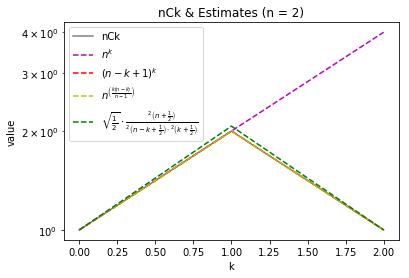

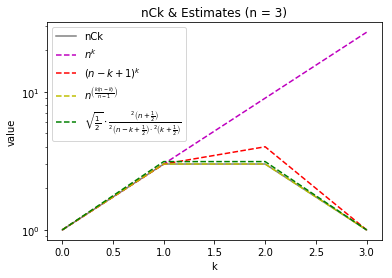

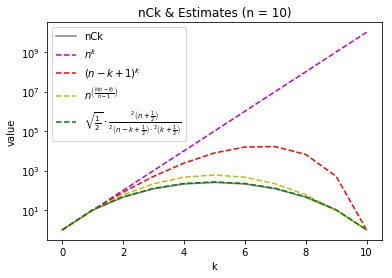

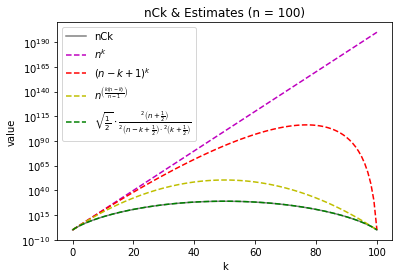

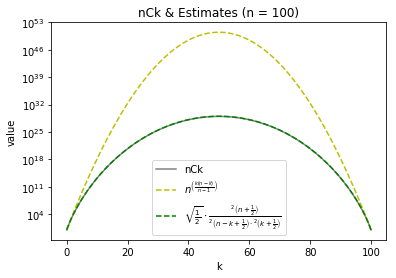

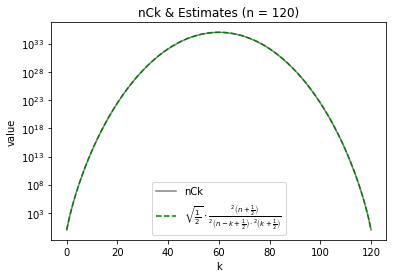

In [14]:
def plot_nckest(n, ests, omitted=0):
    k = np.arange(0,n+1)
    
    points = tuple(j for j in nCk_iter(n))
    plt.plot(k, points, "k-", alpha=.5, label="nCk")
    
    for i, func in enumerate(ests[omitted:], omitted):
        points = func(n,k.astype(np.float64))
        plt.plot(k, points, est_styles[i], label=est_labels[i])
    
    plt.title("nCk & Estimates (n = " + str(n) + ")")
    plt.xlabel("k")
    plt.ylabel("value")
    plt.legend()
    plt.yscale('log')
    plt.show()

plot_nckest(2, nCk_ests)
plot_nckest(3, nCk_ests)
plot_nckest(10, nCk_ests)
plot_nckest(100, nCk_ests)
plot_nckest(100, nCk_ests, omitted=2)
plot_nckest(120, nCk_ests, omitted=3)

In [109]:
def plot_nckest_relative(n, ests, omitted=0):
    k = np.arange(0,n+1)
    points_true = np.array([j for j in nCk_iter(n)])
    plt.plot(k, np.ones_like(k), "k-", alpha=.5, label="unity")
    
    for i, func in enumerate(ests[omitted:], omitted):
        points = func(n,k.astype(np.float64)) / points_true
        plt.plot(k, points, est_styles[i], label=est_labels[i])
    
    plt.title("Error Factor for nCk Estimates (n = " + str(n) + ")")
    plt.xlabel("k")
    plt.ylabel("error factor")
    plt.legend()
    plt.yscale('log')
    plt.show()

plot_nckest_relative(3, nCk_ests)
plot_nckest_relative(10, nCk_ests)
plot_nckest_relative(100, nCk_ests)
plot_nckest_relative(100, nCk_ests, omitted=2)
plot_nckest_relative(120, nCk_ests, omitted=3)

NameError: name 'nCk_ests' is not defined